# Part 1

# Reasons for choosing your data set

The dataset I have chosen (http://insideairbnb.com/get-the-data.html) contains the listing information of Airbnb’s in the city of Seattle. After having a look at this dataset, I wanted to study it in further detail and see what I could find from it. Which is what I will be doing in this coursework. The data was compiled together on the 25th of September 2021, meaning I will be working with up-to-date data. Originally found this dataset on Kaggle but found a newer version of this data from the original source which was given in Kaggle. When looking for a dataset I had a dilemma choosing between this or another dataset. The reason being this dataset has 4000 instances and 74 Attributes while the other one had 10000 instances but only 9 attributes (so I was unsure which would be more important more rows or more columns). After some thought and help from the lab helper I felt that more columns would mean I would be able to find more features from the data and be able to find some more interesting patterns and trends from the data.  

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request




In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2

In [6]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
#seaborn builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


In [8]:
listing_dataset = pd.read_csv("listings.csv")

# Data Engineering

## Get, Prepare & Clean the data

in the tutorials the cleaning stage was done after visualisation however I did it all together as processing was needed for me to able to do some of the visulisation.

In [9]:
pwd

'/Users/adithyasripada/Documents/Adithya/Computing/CS Y4/F20DL/CW'

In [10]:
#shows the first 5 rows of each column.
listing_dataset.head()

id                        listing_url     scrape_id last_scraped  \
0  2318  https://www.airbnb.com/rooms/2318  2.021090e+13   25/09/2021   
1  6606  https://www.airbnb.com/rooms/6606  2.021090e+13   25/09/2021   
2  9419  https://www.airbnb.com/rooms/9419  2.021090e+13   25/09/2021   
3  9531  https://www.airbnb.com/rooms/9531  2.021090e+13   25/09/2021   
4  9534  https://www.airbnb.com/rooms/9534  2.021090e+13   25/09/2021   

                                                name  \
0  Casa Madrona - Urban Oasis 1 block from the park!   
1                Fab, private seattle urban cottage!   
2                Glorious sun room w/ memory foambed   
3                The Adorable Sweet Orange Craftsman   
4                   The Coolest Tangerine Dream MIL!   

                                         description  \
0  Gorgeous, architect remodeled, Dutch Colonial ...   
1  This tiny cottage is only 15x10, but it has ev...   
2  Keeping you safe is our priority, we are adher...   
3  The Sweet Orange is a delightful and spacious ...   
4  Welcome to my delicious Tangerine Dream!  A co...   

                               neighborhood_overview  \
0  Madrona is a hidden gem of a neighborhood. It ...   
1  A peaceful yet highly accessible neighborhood,...   
2  Lots of restaurants (see our guide book) bars,...   
3  The neighborhood is awesome!  Just far enough ...   
4  The neighborhood is the best of two worlds...w...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/02973ad3-a7a3...     2536   
1  https://a0.muscache.com/pictures/45742/21116d7...    14942   
2  https://a0.muscache.com/pictures/56645186/e5fb...    30559   
3  https://a0.muscache.com/pictures/30470355/052c...    31481   
4  https://a0.muscache.com/pictures/30476721/0751...    31481   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/2536  ...                        5.00   
1  https://www.airbnb.com/users/show/14942  ...                        4.76   
2  https://www.airbnb.com/users/show/30559  ...                        4.89   
3  https://www.airbnb.com/users/show/31481  ...                        4.94   
4  https://www.airbnb.com/users/show/31481  ...                        4.98   

  review_scores_location review_scores_value             license  \
0                   4.97                4.82  STR-OPLI-19-002837   
1                   4.88                4.56  str-opli-19-002622   
2                   4.65                4.62  STR-OPLI-19-003039   
3                   4.98                4.88  STR-OPLI-19-002182   
4                   4.95                4.93  STR-OPLI-19-002182   

  instant_bookable calculated_host_listings_count  \
0                t                              1   
1                f                              1   
2                f                              9   
3                f                              2   
4                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           0   
3                                           2   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            9   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.61  
1                                           0              2.42  
2                                           0              1.13  
3                                           0              0.55  
4                                  

From this we can already see what types of data each column stores without having to load the whole data set.

In [11]:
#shows all the values in the dataset.
listing_dataset.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calen

In [12]:
#This Function returns the percentage of missing values for each attribute.
(len(listing_dataset)-listing_dataset.count())/len(listing_dataset)*100

id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               15.344787
Length: 74, dtype: float64

In [13]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4249 non-null   int64  
 1   listing_url                                   4249 non-null   object 
 2   scrape_id                                     4249 non-null   float64
 3   last_scraped                                  4249 non-null   object 
 4   name                                          4249 non-null   object 
 5   description                                   4239 non-null   object 
 6   neighborhood_overview                         3116 non-null   object 
 7   picture_url                                   4249 non-null   object 
 8   host_id                                       4249 non-null   int64  
 9   host_url                                      4249 non-null   o

The .info() method gives us some valuable information about the dataset, which we can use to give us a sense of which attributes may need some pre-processing. As can be seen quite a few attributes have missing values and also have the object data type. So now we will try process and select data that can be used for our tasks.

In [14]:
#Here I am removing the $ and , from the columns and then coverting the overall data type to float64
pd.set_option('display.max_rows', None)
listing_dataset[["price"]]=listing_dataset[["price"]].replace({r'\$':''},regex=True)
listing_dataset[["price"]]=listing_dataset[["price"]].replace({r'\,':''},regex=True)
listing_dataset[["price"]] = listing_dataset[["price"]].astype(float)
listing_dataset[["price"]].dtypes
#a.astype(float)

price    float64
dtype: object

In [15]:
#Here I am removing any words from the columns, leaving only numbers and then coverting the overall data type to float64
pd.set_option('display.max_rows', None)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'bath':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'baths':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'shared':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'private':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Shared half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Private half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r'Half-':''},regex=True)
listing_dataset[["bathrooms_text"]]=listing_dataset[["bathrooms_text"]].replace({r's':''},regex=True)
listing_dataset[["bathrooms_text"]] = listing_dataset[["bathrooms_text"]].astype(float)
listing_dataset[["bathrooms_text"]].dtypes

bathrooms_text    float64
dtype: object

In [16]:
listing_dataset[["calculated_host_listings_count"]]= listing_dataset[["calculated_host_listings_count"]].astype(float)
listing_dataset[["calculated_host_listings_count"]].dtypes

calculated_host_listings_count    float64
dtype: object

In [17]:
listing_dataset[["calculated_host_listings_count_entire_homes"]]= listing_dataset[["calculated_host_listings_count_entire_homes"]].astype(float)
listing_dataset[["calculated_host_listings_count_entire_homes"]].dtypes

calculated_host_listings_count_entire_homes    float64
dtype: object

In [18]:
listing_dataset[["calculated_host_listings_count_private_rooms"]]= listing_dataset[["calculated_host_listings_count_private_rooms"]].astype(float)
listing_dataset[["calculated_host_listings_count_private_rooms"]].dtypes

calculated_host_listings_count_private_rooms    float64
dtype: object

In [19]:
listing_dataset[["calculated_host_listings_count_shared_rooms"]]= listing_dataset[["calculated_host_listings_count_shared_rooms"]].astype(float)
listing_dataset[["calculated_host_listings_count_shared_rooms"]].dtypes

calculated_host_listings_count_shared_rooms    float64
dtype: object

So far the dataset has some unnessecary information that we cant and wont use when processing our data, so we are going to create a smaller dataframe and work on that, we will be dropping the attributes about the host and the urls and descriptions as we will not be able to process that data.

In [20]:
# Creating a Dataframe which consists of all the columns that we will use for the tasks in the dataset.
#We removed the host, Url and Description columns .
listing_df = listing_dataset[['id', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
        'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_30','availability_60', 'availability_90', 'availability_365',
       'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [21]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4249 non-null   int64  
 1   neighbourhood_group_cleansed                  4249 non-null   object 
 2   latitude                                      4249 non-null   float64
 3   longitude                                     4249 non-null   float64
 4   property_type                                 4249 non-null   object 
 5   room_type                                     4249 non-null   object 
 6   accommodates                                  4249 non-null   int64  
 7   bathrooms_text                                4249 non-null   float64
 8   bedrooms                                      3664 non-null   float64
 9   beds                                          4128 non-null   f

Now we are looking at the dataframe's info, which is showing us that there are some missing values and some data types are still object, we will continue to pre-process this.

In [22]:
#checking to see if there are any duplicate values.
duplicate_vals = listing_df.duplicated()
duplicate_vals.sum()

0

In [23]:
#Checking for NaN values in the DF.
(len(listing_df)-listing_df.count())/len(listing_df)*100

id                                               0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.000000
bedrooms                                        13.767945
beds                                             2.847729
price                                            0.000000
minimum_nights                                   0.000000
maximum_nights                                   0.000000
minimum_minimum_nights                           0.070605
maximum_minimum_nights                           0.070605
minimum_maximum_nights                           0.070605
maximum_maximum_nights                           0.070605
minimum_nights

In [24]:
#Dropping the rows with NaN values.
listing_df2=listing_df.dropna(axis=0)

In [25]:
#Checking to see % of dropped NaN values.
(len(listing_df)-len(listing_df2))/len(listing_df)*100

27.347611202635914

In [26]:
#Checking if the NaN values have been dropped.
(len(listing_df2)-listing_df2.count())/len(listing_df2)*100

id                                              0.0
neighbourhood_group_cleansed                    0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms                                        0.0
beds                                            0.0
price                                           0.0
minimum_nights                                  0.0
maximum_nights                                  0.0
minimum_minimum_nights                          0.0
maximum_minimum_nights                          0.0
minimum_maximum_nights                          0.0
maximum_maximum_nights                          0.0
minimum_nights_avg_ntm                          0.0
maximum_nights_avg_ntm                          0.0
availability

In [27]:
#These are the columns which have the object datatype
non_numerical_vals = listing_df2.select_dtypes(include=['object']).columns
listing_df2[non_numerical_vals]

neighbourhood_group_cleansed                        property_type  \
0                    Central Area              Entire residential home   
1             Other neighborhoods                    Entire guesthouse   
2             Other neighborhoods          Private room in rental unit   
3                    West Seattle              Entire residential home   
4                    West Seattle                   Entire guest suite   
5                    West Seattle              Entire residential home   
6                        Delridge     Private room in residential home   
7                        Delridge     Private room in residential home   
8                         Ballard                   Entire guest suite   
9                         Ballard                   Entire rental unit   
10                    Beacon Hill              Entire residential home   
12            Other neighborhoods                   Entire rental unit   
13                   West Seattle     Private room in residential home   
14            Other neighborhoods                    Entire guesthouse   
15            Other neighborhoods                   Entire rental unit   
16            Other neighborhoods                   Entire guest suite   
17                   Central Area     Private room in residential home   
18                   Capitol Hill                   Entire rental unit   
19                     Queen Anne              Entire residential home   
20            Other neighborhoods              Entire residential home   
21            Other neighborhoods     Private room in residential home   
22                       Downtown           Entire condominium (condo)   
23                       Downtown           Entire condominium (condo)   
24                       Magnolia              Private room in cottage   
25                    Beacon Hill          Private room in rental unit   
26                   West Seattle     Private room in residential home   
27                     Queen Anne              Entire residential home   
28                     Queen Anne                   Entire rental unit   
29            Other neighborhoods                   Entire rental unit   
30                        Ballard                   Entire guest suite   
31                       Downtown           Entire condominium (condo)   
32                     Queen Anne              Entire residential home   
33            Other neighborhoods                   Entire guest suite   
34                       Downtown           Entire condominium (condo)   
35                        Cascade           Entire condominium (condo)   
36                   Capitol Hill           Entire condominium (condo)   
37            Other neighborhoods                   Entire rental unit   
38                   West Seattle                    Entire guesthouse   
39                   West Seattle              Entire residential home   
40                   Capitol Hill                   Entire rental unit   
41                       Downtown                   Entire rental unit   
42                       Downtown                 Private room in loft   
43            Other neighborhoods              Entire residential home   
44            Other neighborhoods     Private room in residential home   
45                   Capitol Hill                   Entire rental unit   
46                    Beacon Hill     Private room in residential home   
47                    Beacon Hill                    Entire guesthouse   
48            Other neighborhoods           Private room in guesthouse   
49            Other neighborhoods              Entire residential home   
50                        Ballard                   Entire rental unit   
51                      Lake City                         Private room   
52                 Rainier Valley                   Entire rental unit   
53            Other neighborhoods     Private room in residential home   
54       

In [28]:
#This will use the pandas .get_dummies() method to to take those object values and convert them into numerical values
dummies = pd.get_dummies(listing_df2[non_numerical_vals], drop_first = True)


In [29]:
#Now we will merge the new numerical values columns and drop the non-numerical columns from the dataframe
listing_df3 = listing_df2.drop(non_numerical_vals,axis=1)
listing_df3 = pd.merge(listing_df3,dummies, left_index=True, right_index=True)
listing_df3.head()

id  latitude  longitude  accommodates  bathrooms_text  bedrooms  beds  \
0  2318  47.61094 -122.29286             9             2.5       4.0   4.0   
1  6606  47.65444 -122.33629             2             1.0       1.0   1.0   
2  9419  47.55017 -122.31937             2             3.0       1.0   2.0   
3  9531  47.55495 -122.38663             4             1.0       2.0   3.0   
4  9534  47.55627 -122.38607             3             1.0       2.0   2.0   

   price  minimum_nights  maximum_nights  ...  \
0  449.0               7            1125  ...   
1   99.0               3            1125  ...   
2   75.0               2             180  ...   
3  174.0               3            1125  ...   
4  145.0               5            1125  ...   

   property_type_Room in boutique hotel  property_type_Room in hotel  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   property_type_Shared room  property_type_Shared room in residential home  \
0                          0                                              0   
1                          0                                              0   
2                          0                                              0   
3                          0                                              0   
4                          0                                              0   

   property_type_Shared room in townhouse  property_type_Tent  \
0                                       0                   0   
1                                       0                   0   
2                                       0                   0   
3                                       0                   0   
4                                       0                   0   

   property_type_Tiny house  room_type_Private room  room_type_Shared room  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       1                      0   
3                         0                       0                      0   
4                         0                       0                      0   

   instant_bookable_t  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 95 columns]

In [30]:
#This method shows a statistical summary of the numerical attributes 
pd.set_option('display.max_columns', None)
listing_df3.describe() 

id     latitude    longitude  accommodates  bathrooms_text  \
count  3.087000e+03  3087.000000  3087.000000   3087.000000     3087.000000   
mean   2.851721e+07    47.624591  -122.334183      4.126660        1.360058   
std    1.642464e+07     0.050721     0.034934      2.508797        0.660928   
min    2.318000e+03    47.496920  -122.419050      1.000000        0.000000   
25%    1.485660e+07    47.591995  -122.358465      2.000000        1.000000   
50%    2.787501e+07    47.622990  -122.332880      4.000000        1.000000   
75%    4.467301e+07    47.664555  -122.307570      5.000000        1.500000   
max    5.233190e+07    47.734010  -122.241490     16.000000        6.000000   

          bedrooms         beds        price  minimum_nights  maximum_nights  \
count  3087.000000  3087.000000  3087.000000     3087.000000     3087.000000   
mean      1.666019     2.161970   164.603175       11.856819      546.856495   
std       0.992628     1.576831   121.768912       15.340219      540.167793   
min       1.000000     0.000000    19.000000        1.000000        1.000000   
25%       1.000000     1.000000    91.000000        2.000000       30.000000   
50%       1.000000     2.000000   132.000000        3.000000      365.000000   
75%       2.000000     3.000000   198.000000       30.000000     1125.000000   
max       8.000000    19.000000  1500.000000      180.000000    10000.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             3087.000000             3087.000000             3087.000000   
mean                11.644639               13.969874              828.050534   
std                 19.897918               35.301370              494.166159   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                2.000000              365.000000   
50%                  2.000000                3.000000             1125.000000   
75%                 30.000000               30.000000             1125.000000   
max                730.000000              730.000000            10000.000000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count             3087.000000             3087.000000             3087.000000   
mean               858.868481               13.189958              843.175867   
std                475.352079               34.319799              482.624660   
min                  4.000000                1.000000                4.000000   
25%                365.000000                2.000000              365.000000   
50%               1125.000000                3.000000             1125.000000   
75%               1125.000000               30.000000             1125.000000   
max              10000.000000              730.000000            10000.000000   

       availability_30  availability_60  availability_90  availability_365  \
count      3087.000000      3087.000000      3087.000000       3087.000000   
mean          8.755750        24.728539        43.349854        175.227405   
std           9.294906        19.411568        29.157361        120.351317   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         5.000000        16.000000         68.500000   
50%           6.000000        24.000000        47.000000        157.000000   
75%          15.000000        40.000000        67.500000        295.500000   
max          30.000000        60.000000        90.000000        365.000000   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
count        3087.000000            3087.000000             3087.000000   
mean           73.660512              15.617428                2.019760   
std            98.335338              18.679783                2.388797   
min             1.000000               0.000000                0.000000   
25%            10.000000               2.00000

## Vizualising the Data

## Experimenting with Attribute Combinations

In [31]:
#listing_df3["rooms_per_household"] = listing_df3["total_rooms"]+listing_df3["households"]
#listing_df3["bedrooms_per_room"] = listing_df3["total_bedrooms"]/listing_df3["total_rooms"]
#listing_df3["population_per_household"]=listing_df3["population"]/listing_df3["households

In [32]:
corr_matrix = listing_df3.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["price"].sort_values(ascending=False)

price                                                1.000000
bedrooms                                             0.635259
accommodates                                         0.615051
beds                                                 0.558952
bathrooms_text                                       0.541549
property_type_Entire residential home                0.386751
property_type_Entire townhouse                       0.169083
neighbourhood_group_cleansed_Queen Anne              0.138513
availability_30                                      0.114986
review_scores_location                               0.114288
property_type_Entire villa                           0.103592
review_scores_rating                                 0.096744
availability_60                                      0.087913
review_scores_cleanliness                            0.086359
property_type_Private room in boat                   0.071404
neighbourhood_group_cleansed_Downtown                0.066713
availabi

# Prepare the Data for Machine Learning Algorithms

In [33]:
#Dropping Price 
listing_df4 = listing_df3.drop("price", axis=1) 


In [34]:
listing_df3.describe()

id     latitude    longitude  accommodates  bathrooms_text  \
count  3.087000e+03  3087.000000  3087.000000   3087.000000     3087.000000   
mean   2.851721e+07    47.624591  -122.334183      4.126660        1.360058   
std    1.642464e+07     0.050721     0.034934      2.508797        0.660928   
min    2.318000e+03    47.496920  -122.419050      1.000000        0.000000   
25%    1.485660e+07    47.591995  -122.358465      2.000000        1.000000   
50%    2.787501e+07    47.622990  -122.332880      4.000000        1.000000   
75%    4.467301e+07    47.664555  -122.307570      5.000000        1.500000   
max    5.233190e+07    47.734010  -122.241490     16.000000        6.000000   

          bedrooms         beds        price  minimum_nights  maximum_nights  \
count  3087.000000  3087.000000  3087.000000     3087.000000     3087.000000   
mean      1.666019     2.161970   164.603175       11.856819      546.856495   
std       0.992628     1.576831   121.768912       15.340219      540.167793   
min       1.000000     0.000000    19.000000        1.000000        1.000000   
25%       1.000000     1.000000    91.000000        2.000000       30.000000   
50%       1.000000     2.000000   132.000000        3.000000      365.000000   
75%       2.000000     3.000000   198.000000       30.000000     1125.000000   
max       8.000000    19.000000  1500.000000      180.000000    10000.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             3087.000000             3087.000000             3087.000000   
mean                11.644639               13.969874              828.050534   
std                 19.897918               35.301370              494.166159   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                2.000000              365.000000   
50%                  2.000000                3.000000             1125.000000   
75%                 30.000000               30.000000             1125.000000   
max                730.000000              730.000000            10000.000000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count             3087.000000             3087.000000             3087.000000   
mean               858.868481               13.189958              843.175867   
std                475.352079               34.319799              482.624660   
min                  4.000000                1.000000                4.000000   
25%                365.000000                2.000000              365.000000   
50%               1125.000000                3.000000             1125.000000   
75%               1125.000000               30.000000             1125.000000   
max              10000.000000              730.000000            10000.000000   

       availability_30  availability_60  availability_90  availability_365  \
count      3087.000000      3087.000000      3087.000000       3087.000000   
mean          8.755750        24.728539        43.349854        175.227405   
std           9.294906        19.411568        29.157361        120.351317   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         5.000000        16.000000         68.500000   
50%           6.000000        24.000000        47.000000        157.000000   
75%          15.000000        40.000000        67.500000        295.500000   
max          30.000000        60.000000        90.000000        365.000000   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
count        3087.000000            3087.000000             3087.000000   
mean           73.660512              15.617428                2.019760   
std            98.335338              18.679783                2.388797   
min             1.000000               0.000000                0.000000   
25%            10.000000               2.00000

In [35]:
listing_df3["price_bins"] = pd.cut(listing_df3["price"],
                               bins=[0,200,400,600,800,1000,1200,1400,1600,1800, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
listing_df3["price_bins"].astype(int)

0       3
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
12      1
13      1
14      1
15      1
16      1
17      1
18      2
19      4
20      2
21      1
22      2
23      1
24      1
25      1
26      1
27      2
28      1
29      1
30      1
31      1
32      3
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      2
42      1
43      3
44      1
45      1
46      1
47      1
48      1
49      2
50      1
51      1
52      1
53      1
54      1
55      2
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      2
65      2
66      1
67      1
68      1
69      1
70      1
71      2
72      1
73      2
74      1
75      1
76      1
77      1
78      1
79      2
80      1
81      1
82      3
84      2
85      1
86      2
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      2
96      1
97      1
98      1
99      1
100     1
101     1
102     1


In [36]:
listing_df3["price_bins"].value_counts()

1     2358
2      608
3       86
4       19
5       12
6        2
7        1
8        1
9        0
10       0
Name: price_bins, dtype: int64

<AxesSubplot:>

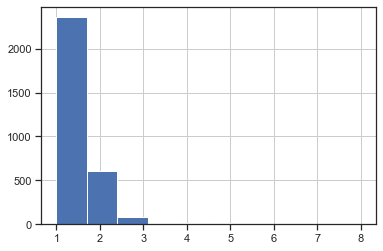

In [37]:
listing_df3["price_bins"].hist()

# Modelling & Evaluation

### Processed Dataset

In [38]:
X_df = listing_df4



In [39]:
y_df = listing_df3['price_bins']
y=y_df.values
#y=np.ravel(y_df)

print(X_df.shape)

print(y.shape)

(3087, 94)
(3087,)


In [40]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y=le.fit_transform(y)
#print(y.dtype)
#print(y.shape)

In [41]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_df,y) # fitting the data

GaussianNB()

In [42]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_df) # store the prediction data
accuracy_score(y,y_pred) # calculate the accuracy


0.7648202137998056

In [43]:
y.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True)

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred,labels=[1,2,3,4,5,6,7,8,9,10]))


[[2358    0    0    0    0    0    0    0    0    0]
 [ 607    1    0    0    0    0    0    0    0    0]
 [  86    0    0    0    0    0    0    0    0    0]
 [  19    0    0    0    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [45]:

diff = [u for u in y if u not in y_pred]
len(diff)

119

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))#,target_names=[1,2,3,4,5,6,7,8,9,10]))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87      2358
           2       1.00      0.00      0.00       608
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1

    accuracy                           0.76      3087
   macro avg       0.47      0.38      0.36      3087
weighted avg       0.78      0.76      0.66      3087



/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adithyasripada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [47]:
y_pred_prob = nv.predict_proba(X_df)[:,1]

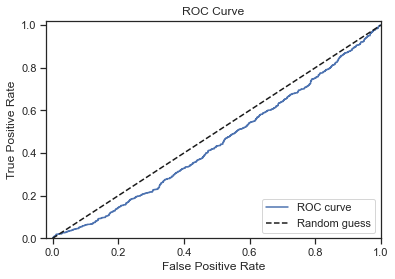

In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y, y_pred_prob, pos_label=1)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### Dataset 1

In [49]:
review_df = listing_df3[['number_of_reviews',
        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [50]:
review_df

number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                    35                  4.97                    5.00   
1                   157                  4.60                    4.67   
2                   153                  4.67                    4.75   
3                    49                  4.96                    4.98   
4                    58                  4.98                    4.98   
5                    77                  4.81                    4.88   
6                    43                  4.36                    4.27   
7                    25                  4.50                    4.46   
8                   877                  4.92                    4.92   
9                    97                  4.25                    4.31   
10                   28                  4.82                    4.84   
12                   46                  4.73                    4.87   
13                  143                  4.92                    4.94   
14                  442                  4.93                    4.94   
15                  126                  4.68                    4.84   
16                  322                  4.86                    4.91   
17                  163                  4.84                    4.82   
18                   45                  4.93                    4.80   
19                  260                  4.98                    4.94   
20                   28                  4.48                    4.62   
21                   75                  4.76                    4.69   
22                  204                  4.73                    4.83   
23                  136                  4.73                    4.78   
24                  226                  4.77                    4.69   
25                  172                  4.79                    4.75   
26                    1                  0.00                    3.00   
27                  106                  4.76                    4.84   
28                  299                  4.72                    4.80   
29                  161                  4.91                    4.92   
30                   94                  4.90                    4.94   
31                  144                  4.85                    4.87   
32                   75                  4.66                    4.63   
33                  107                  4.97                    4.99   
34                  245                  4.81                    4.90   
35                   12                  4.83                    4.83   
36                  120                  4.63                    4.75   
37                  201                  4.81                    4.88   
38                   78                  4.76                    4.84   
39                   50                  4.87                    4.79   
40                   26                  4.88                    4.96   
41                  154                  4.81                    4.88   
42                  757                  4.73                    4.81   
43                   43                  4.91                    4.81   
44                  245                  4.95                    4.91   
45                  178                  4.78                    4.79   
46                  277                  4.88                    4.86   
47                  151                  4.81                    4.89   
48                  357                  4.85                    4.92   
49                  109                  4.86                    4.91   
50                  317                  4.85                    4.88   
51                  116                  4.81                    4.79   
52                  367                  4.82                    4.85   
53                  181                  4.81                    4.75   
54                  441                  4.83                   

In [51]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = review_df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_accuracy         0.814324
review_scores_value            0.797925
review_scores_cleanliness      0.786535
review_scores_communication    0.738811
review_scores_checkin          0.612579
review_scores_location         0.554741
number_of_reviews              0.143357
Name: review_scores_rating, dtype: float64

In [52]:
#Dropping Price 
review_df1 = review_df.drop("review_scores_rating", axis=1) 

In [53]:
review_df1["review_score_bin"] = pd.cut(review_df["review_scores_rating"],
                               bins=[-0.5, 0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5 ],
                               labels=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11])
No_NaN_review_df=review_df1.dropna(axis=0)
No_NaN_review_df["review_score_bin"]=No_NaN_review_df["review_score_bin"].astype(int)

In [54]:
print(review_df1.shape)

print(No_NaN_review_df["review_score_bin"].shape)

(3087, 8)
(3087,)


In [55]:
clf = GaussianNB()
clf.fit(review_df1, No_NaN_review_df["review_score_bin"])


GaussianNB()

In [56]:
X_rdf = review_df1

In [57]:
y_df1 = No_NaN_review_df["review_score_bin"]
y1=y_df1.values
#y=np.ravel(y_df)

print(X_rdf.shape)

print(y1.shape)

(3087, 8)
(3087,)


In [58]:
clf = GaussianNB()
clf.fit(X_rdf,y1) # fitting the data

GaussianNB()

In [102]:
from sklearn.metrics import accuracy_score
y_pred1 = clf.predict(X_rdf) # store the prediction data
accuracy_score(y1, y_pred1) # calculate the accuracy


1.0

# P5 Decision Tree and Logistic Regression

In [61]:
LDF = listing_df2[['neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
        'price', 
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','availability_365',
       'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count','reviews_per_month']]

In [66]:
X = LDFP1.to_numpy()

In [103]:
X = LDF.data[:, 2:] 
y = LDF.target

AttributeError: 'DataFrame' object has no attribute 'data'

# Clustering


This section of the notebook I will using Scikit-Learn functions to run and explore the  K-Means clustering algorithms, Evaluate the clustering results, Find the optimal number of clusters & Explore limitations  of K-Means.





## Trying to visually find value for K

Trying to created plots to see where I can see clustering.

In [60]:
listing_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3087 entries, 0 to 4220
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3087 non-null   int64  
 1   neighbourhood_group_cleansed                  3087 non-null   object 
 2   latitude                                      3087 non-null   float64
 3   longitude                                     3087 non-null   float64
 4   property_type                                 3087 non-null   object 
 5   room_type                                     3087 non-null   object 
 6   accommodates                                  3087 non-null   int64  
 7   bathrooms_text                                3087 non-null   float64
 8   bedrooms                                      3087 non-null   float64
 9   beds                                          3087 non-null   f

In [62]:
LDFR = listing_df2[[ 'price', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'review_scores_value',]]

In [63]:
LDFP = listing_df2[[ 'price', 'review_scores_rating']]

In [64]:
LDFP = listing_df2[[ 'review_scores_communication', 'review_scores_rating']]

In [65]:
LDFP1=LDFP.reset_index(drop=True)
LDFP1

review_scores_communication  review_scores_rating
0                            5.00                  4.97
1                            4.76                  4.60
2                            4.89                  4.67
3                            4.94                  4.96
4                            4.98                  4.98
5                            4.95                  4.81
6                            4.73                  4.36
7                            4.79                  4.50
8                            4.98                  4.92
9                            4.75                  4.25
10                           4.95                  4.82
11                           4.67                  4.73
12                           4.96                  4.92
13                           4.98                  4.93
14                           4.84                  4.68
15                           4.94                  4.86
16                           4.89                  4.84
17                           5.00                  4.93
18                           4.96                  4.98
19                           4.96                  4.48
20                           4.87                  4.76
21                           4.90                  4.73
22                           4.84                  4.73
23                           4.95                  4.77
24                           4.88                  4.79
25                           5.00                  0.00
26                           4.91                  4.76
27                           4.88                  4.72
28                           4.98                  4.91
29                           4.93                  4.90
30                           4.88                  4.85
31                           4.87                  4.66
32                           4.99                  4.97
33                           4.88                  4.81
34                           4.83                  4.83
35                           4.85                  4.63
36                           4.94                  4.81
37                           4.84                  4.76
38                           4.92                  4.87
39                           5.00                  4.88
40                           4.91                  4.81
41                           4.94                  4.73
42                           4.88                  4.91
43                           4.97                  4.95
44                           4.85                  4.78
45                           4.92                  4.88
46                           4.84                  4.81
47                           4.93                  4.85
48                           4.94                  4.86
49                           4.95                  4.85
50                           4.89                  4.81
51                           4.89                  4.82
52                           4.87                  4.81
53                           4.90                  4.83
54                           4.97                  4.79
55                           4.94                  4.76
56                           4.89                  4.68
57                           4.92                  4.66
58                           4.89                  4.85
59                           4.86                  4.83
60                           4.88                  4.81
61                           4.95                  4.71
62                           5.00                  5.00
63                           5.00                  4.80
64                           4.97                  4.92
65                           4.96                  4.89
66                           3.67                  3.78
67                           4.79                  4.81
68                           4.58                  4.12
69                           4.87                  4.79
70                           4

In [67]:
from sklearn.datasets import make_blobs


## k-means

Here I will be training the Kmeans algorithm to cluster the dataset. It will find the centroid and assign each instance to the closest centroid

In [68]:
from sklearn.cluster import KMeans

In [69]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [70]:
y_pred

array([0, 3, 3, ..., 0, 3, 0], dtype=int32)

each point gets assigned to 1 of the 5 cluster centroids

In [71]:
y_pred is kmeans.labels_

True

Below are the 5 centroids that were calculated by the K-means algorithm

In [72]:
kmeans.cluster_centers_

array([[4.96278169, 4.90928257],
       [4.1944186 , 4.08426357],
       [1.75533333, 1.76666667],
       [4.81899536, 4.57241113],
       [4.28583333, 2.65708333]])

In [73]:
kmeans.labels_

array([0, 3, 3, ..., 0, 3, 0], dtype=int32)

In [74]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2], dtype=int32)

## Decision Boundaries


In [75]:
def plot_data(X):
    print(len(X))
    print(X[:,0])
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


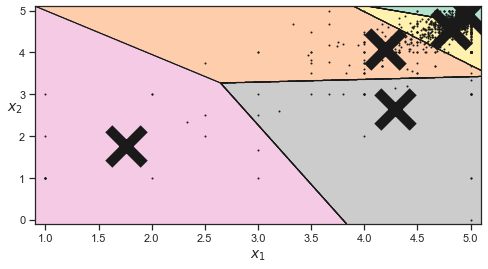

In [76]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

After running that code the boundaries for the clusters are given in a Voronoi diagram. With this dataset it is difficult to find clusers by eye. So we will continue to do some more processing to find the best method at clustering.

## Hard Clustering vs Soft Clustering

In Hard Clustering each point is assigned to a centroid. However in soft clustering instead of being yes or no regarding the assignment of points to a centroid, it happens that the probability of that data point being in a specific cluster occurs instead.

In [77]:
kmeans.transform(X_new)

array([[5.75266262, 4.68372737, 1.77077372, 5.46260152, 4.33591119],
       [3.50947817, 2.40224695, 1.26634891, 3.15056235, 1.44399649],
       [8.1884829 , 7.27566399, 4.91266793, 7.97553542, 7.29389877],
       [8.31928691, 7.36678696, 4.81154579, 8.0889787 , 7.2875265 ]])

In [78]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[5.75266262, 4.68372737, 1.77077372, 5.46260152, 4.33591119],
       [3.50947817, 2.40224695, 1.26634891, 3.15056235, 1.44399649],
       [8.1884829 , 7.27566399, 4.91266793, 7.97553542, 7.29389877],
       [8.31928691, 7.36678696, 4.81154579, 8.0889787 , 7.2875265 ]])

running the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [79]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


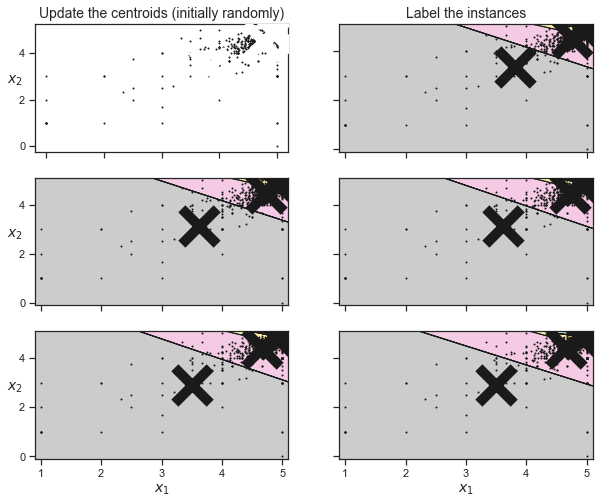

In [80]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### GGM


In [81]:
from sklearn.mixture import GaussianMixture

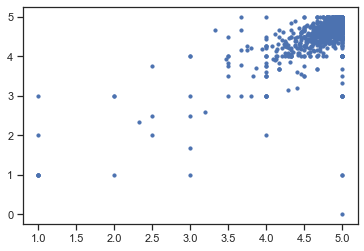

In [82]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.scatter(X[:, 0], X[:, 1], s=10, cmap='viridis');

### K-Means Variability

In [83]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


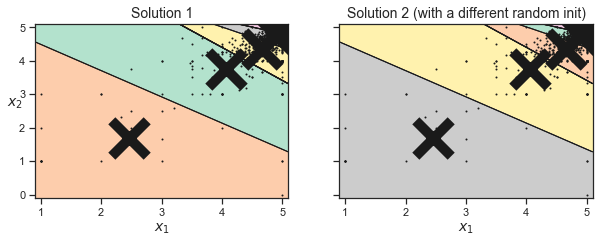

In [84]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

Since my data has only 1 dominant cluster, there is not that many ways that it can be varied as much as it could be for other data sets, thats why solution 1 and 2 look similar apart from the colours.

### Inertia

Intertia is a way to evaluate the K-means model performance by measuring the distance between an instance and its assigned centroid.

In [85]:
kmeans.inertia_

129.79756069906838

In [86]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

129.79756069907506

In [87]:
kmeans.score(X)

-129.79756069906847

### Multiple Initializations

Here I will run the K-means algorithms a few times  and pick the one with the smallest intertia.

In [88]:
kmeans_rnd_init1.inertia_

138.2966860326754

In [89]:
kmeans_rnd_init2.inertia_

138.2966860326754

In [90]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


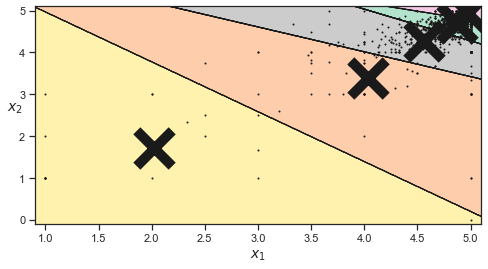

In [91]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

The boundaries are still not optimal

## Finding the optimal number of clusters

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


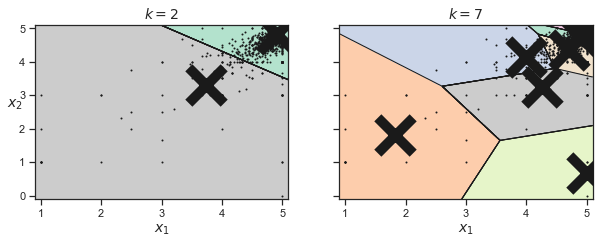

In [92]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k7 = KMeans(n_clusters=7, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k7, X, "$k=2$", "$k=7$")
plt.show()

As you can see when setting the the K to 2 and 7, it is not able to create the most precies clusters. So we will have to find the optimal number. First we will find their intertias.

In [93]:
kmeans_k2.inertia_

368.55219102965356

In [94]:
kmeans_k7.inertia_

92.2152093393813

We cannot just set a k value that returns the smallest inertia as it will keep getting lower. If we keep increasing the number of clusters it will get to a point where there is a very small intertia but there will be as many clusters as there are data points. What we want to do is find the optimal number of k. We can do this by plotting the inertia as a function of  𝑘 to analyse the curve.

In [95]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

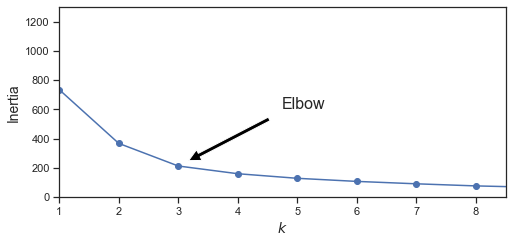

In [96]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As can be seen there is an elbow at 3, this seems to be the most optimal value for k as if we have less clusters than that it wouldnt be good, and more clusters would not be precise and not group clusters effectively. Based on the curve, at k=3 the graphs curvature becomes steeper which is why I chose 3. 

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


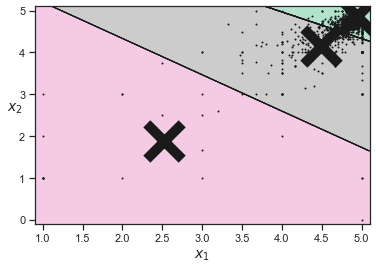

In [97]:
plot_decision_boundaries(kmeans_per_k[3-1], X)
plt.show()

From looking at the graph when using the optimal number of cluster that we have found. It seems that this does seem to be a good value for clusters as its boundaries are placed at edges where there are gaps between the smaller clusters.

## Pros and Cons

The cons of K-means. One of the cons are that we have to run the algorithm several times to avoid bad solutions. Another con is that you need to specify the number of clusters which is a problem when having datasets where it is difficult to visulise the clusters. However once you find the right number of cluster it is a good algorthm to use.


In [98]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

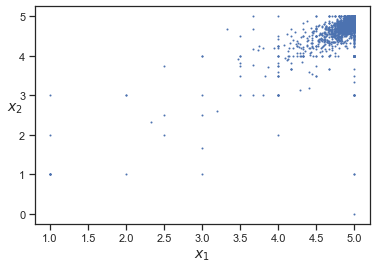

In [99]:
plot_clusters(X)

In [100]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)


KMeans(n_clusters=3, random_state=42)

3087
[5.   4.76 4.89 ... 5.   5.   5.  ]
3087
[5.   4.76 4.89 ... 5.   5.   5.  ]


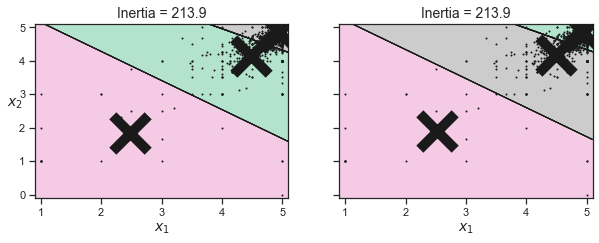

In [101]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)


plt.show()